In [32]:
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import math

In [33]:
def load_model ():
    if not os.path.exists("model/word2vec-google-news-300.model"):
        print("downloading")
        model = api.load("word2vec-google-news-300")
        model.save("model/word2vec-google-news-300.model")
    else:
        print("retrieving")
        model = KeyedVectors.load("model/word2vec-google-news-300.model")
    return model

In [34]:
def find_similarity (model, word1, word2):
    word1 = word1[0]
    word2 = word2[0]
    try:
        similarity = model.similarity(word1, word2)
    except:
        similarity = 0
    if similarity > 0.4:
        return similarity
    else:
        return 0

In [35]:
load_model()

retrieving


In [46]:
def normalize(l):
    min_val = min(l)
    max_val = max(l)
    normalized_size_map = [(x-min_val)/(max_val - min_val)*10000 for x in l]
    return normalized_size_map

def create_graph (filename, d):
    with open(filename, "r") as f:
        content = json.load(f)
    model = load_model()
        
    for k, v in content.items():
        if len(v) == 0:
            continue
        pos_negG = nx.Graph()
        neuG = nx.Graph()

        pos_neg_size_map = []
        pos_neg_color_map = []

        neu_size_map = []
        for word, info in v.items():
            if word in ["morning", "afternoon", "night", "saturday", "sunday", "johnson", "minneapolis", "minnesota", "paul", "james", "day", "week", "ave", "man", "miss", "mrs", "mr", "years", "month", "year", "john", "said", "son", "new", "was", "went"]:
                continue
            frequency = info["frequency"]

            sentiment = info["sentiment"]
            if sentiment["neutral"] > 0.6:

                neu_size_map.append(frequency)
                if len(neu_size_map) > 25:
                    del neu_size_map[-1]
                    continue
                neuG.add_node(word, size=info["frequency"])
            elif sentiment["positive"] >= sentiment["negative"]:
                pos_neg_color_map.append("#ADD8E6")
                if len(pos_neg_color_map) > 30:
                    del pos_neg_color_map[-1]
                    continue
                pos_neg_size_map.append(frequency)
                pos_negG.add_node(word, size=info['frequency'])
            elif sentiment["negative"] > sentiment["positive"]:
                pos_neg_color_map.append("#FF7F7F")
                pos_neg_size_map.append(frequency)
                pos_negG.add_node(word, size=info["frequency"])
                
        pos_neg_size_G = len(list(pos_negG.nodes(data=True)))
        for i in range(pos_neg_size_G-1):
            word = list(pos_negG.nodes(data=True))[i]
            for j in range(i+1, pos_neg_size_G):
                target_word = list(pos_negG.nodes(data=True))[j]
                similarity = find_similarity(model, word, target_word)
                if similarity:
                    pos_negG.add_edge(word[0], target_word[0], weight = similarity)
        pos = nx.spring_layout(pos_negG, k= 7/math.sqrt(pos_negG.order()))
        normalized_size_map = normalize(pos_neg_size_map)

        plt.figure(figsize=(8,8))
        nx.draw(pos_negG, pos, with_labels=True, node_size = normalized_size_map, node_color=pos_neg_color_map, font_size = 8)
        plt.savefig(f"{d}/graph_{k}_pos_neg.jpg", format="jpg")

        
        neu_size_G = len(list(neuG.nodes(data=True)))
        for i in range(neu_size_G-1):
            word = list(neuG.nodes(data=True))[i]
            for j in range(i+1, neu_size_G):
                target_word = list(neuG.nodes(data=True))[j]
                similarity = find_similarity(model, word, target_word)
                if similarity:
                    neuG.add_edge(word[0], target_word[0], weight = similarity)
        pos = nx.spring_layout(neuG, k= 7/math.sqrt(neuG.order()))
        min_val = min(neu_size_map)
        max_val = max(neu_size_map)
        normalized_size_map = [(x-min_val)/(max_val - min_val)*10000 for x in neu_size_map]
        plt.figure(figsize=(8,8))
        nx.draw(neuG, pos, with_labels=True, node_size = normalized_size_map, node_color=["#d3d3d3" for x in neu_size_map], font_size = 8)
        plt.savefig(f"{d}/graph_{k}_neu.jpg", format="jpg")

        
            
            

retrieving


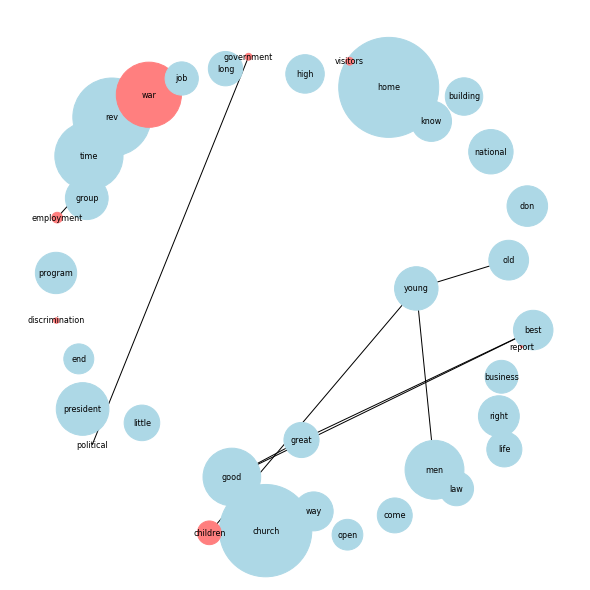

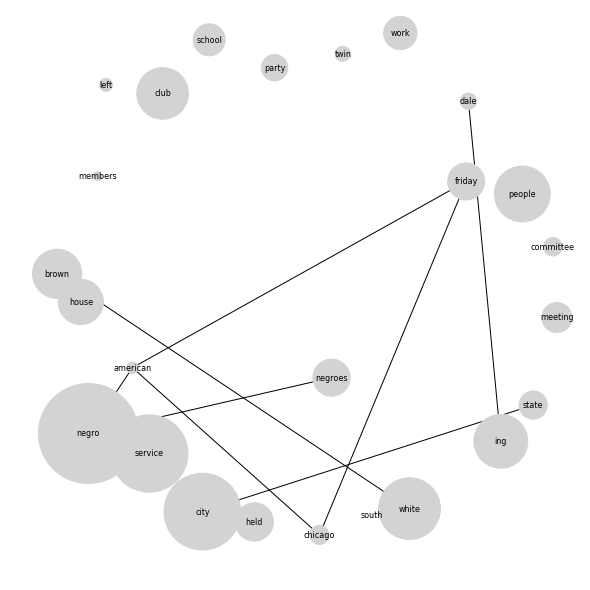

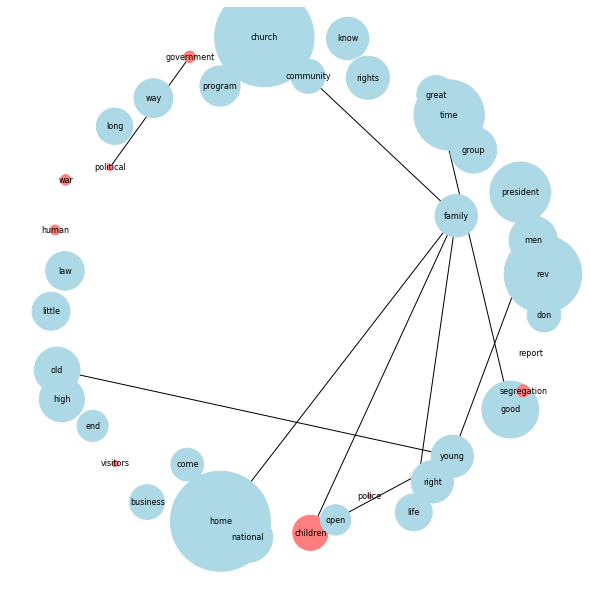

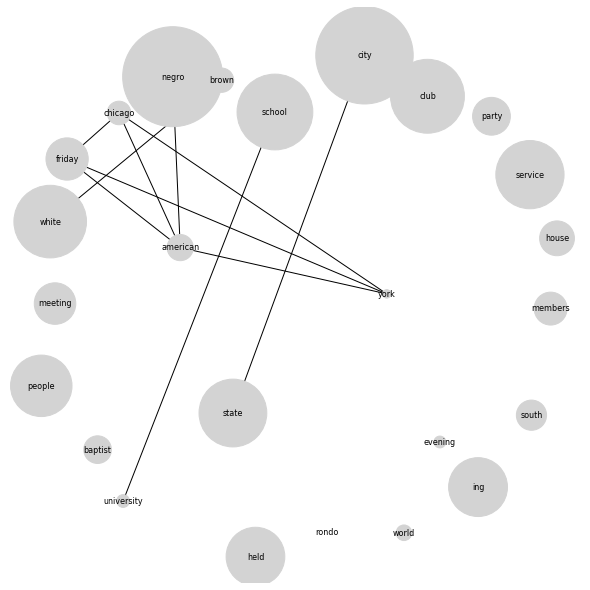

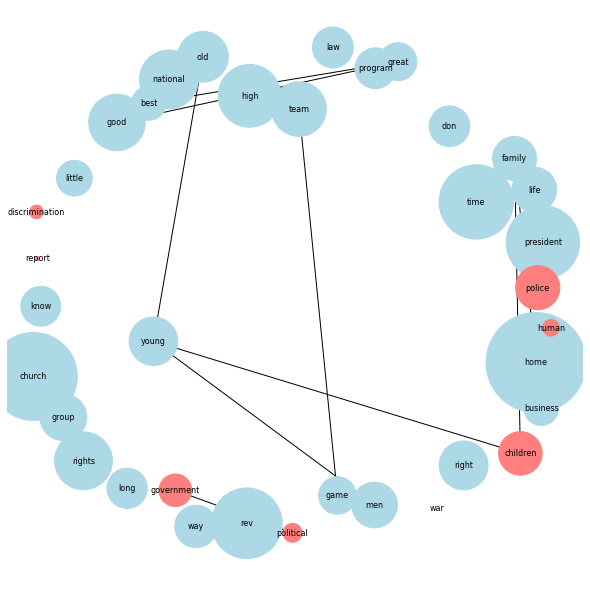

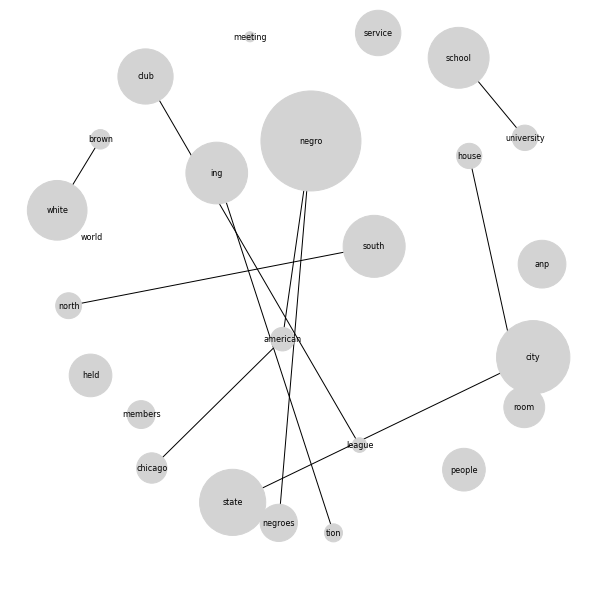

In [47]:
create_graph("refined_results_0.json", "0")

retrieving
retrieving
retrieving


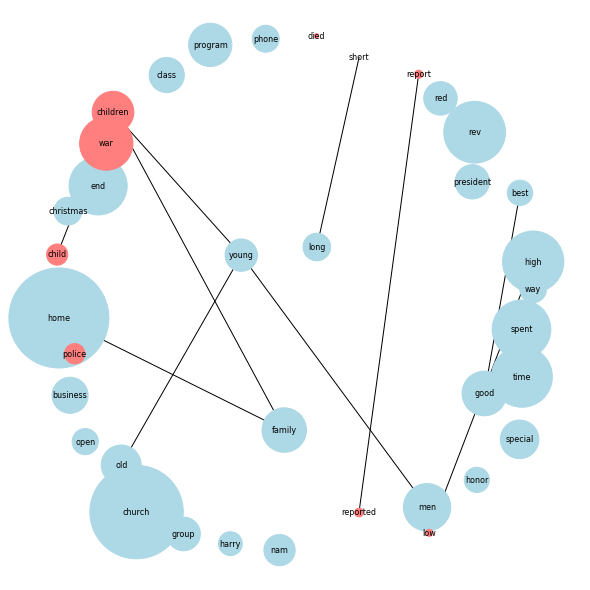

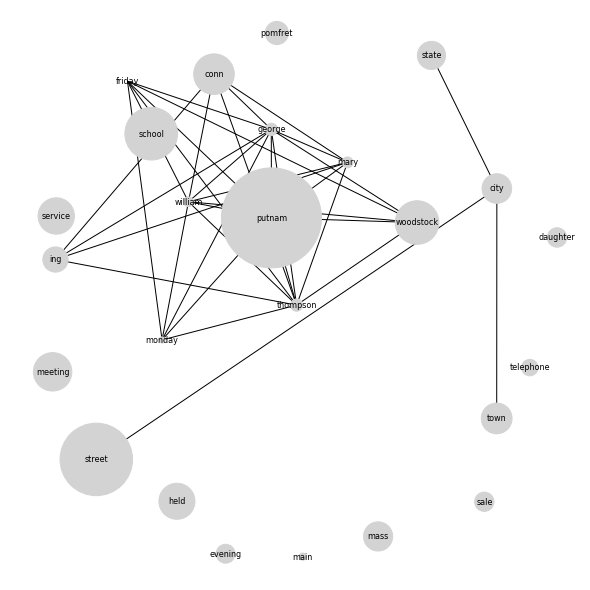

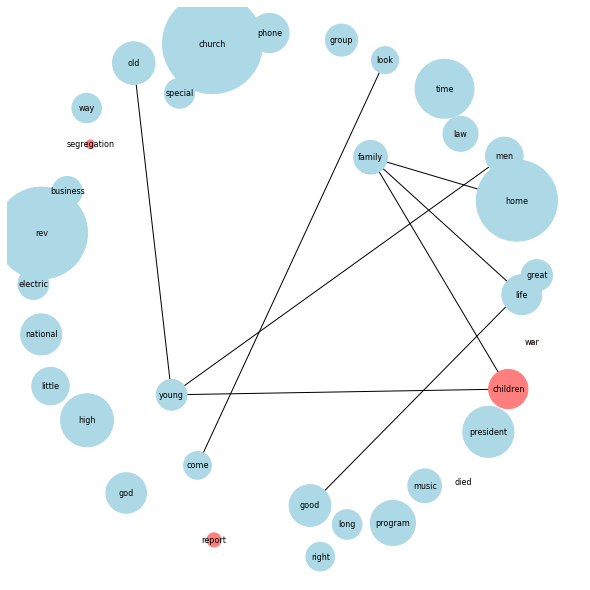

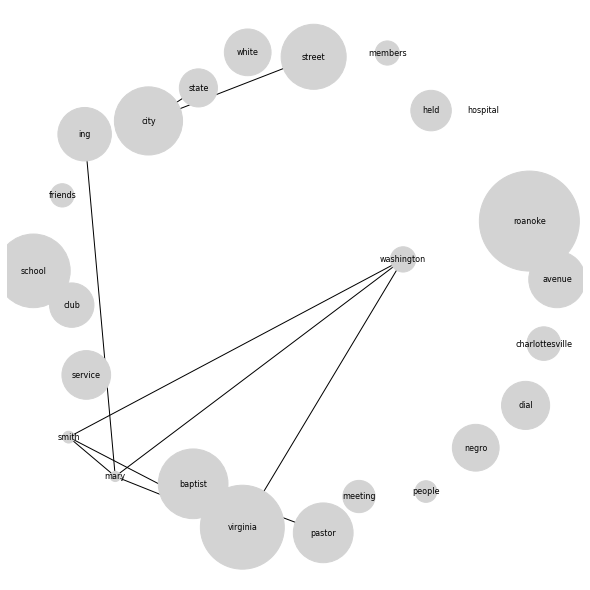

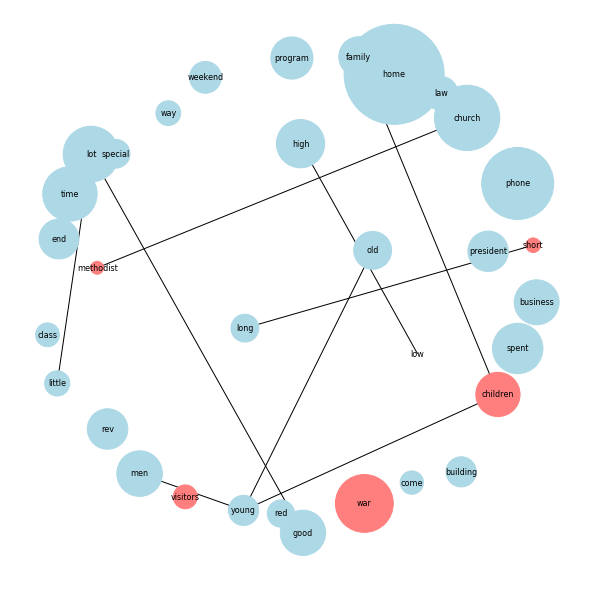

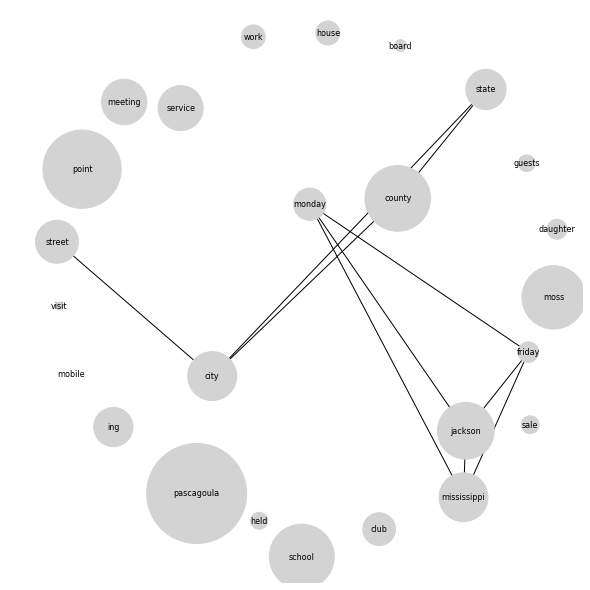

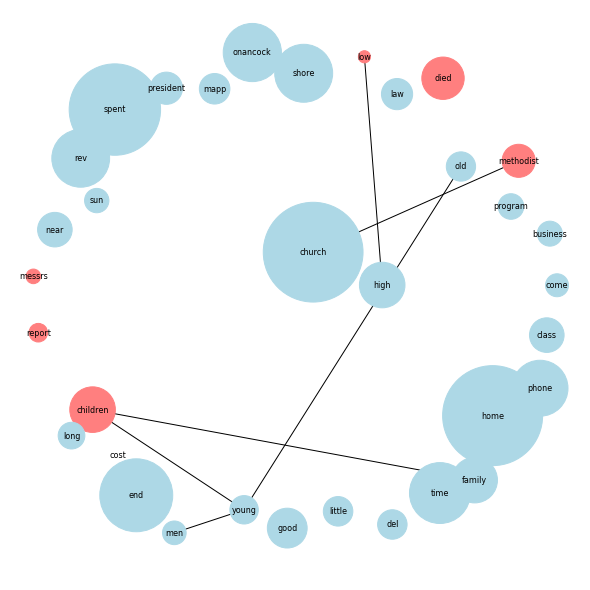

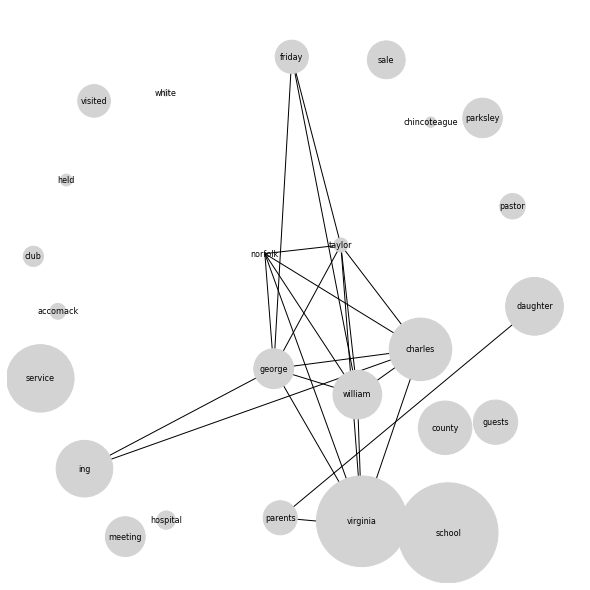

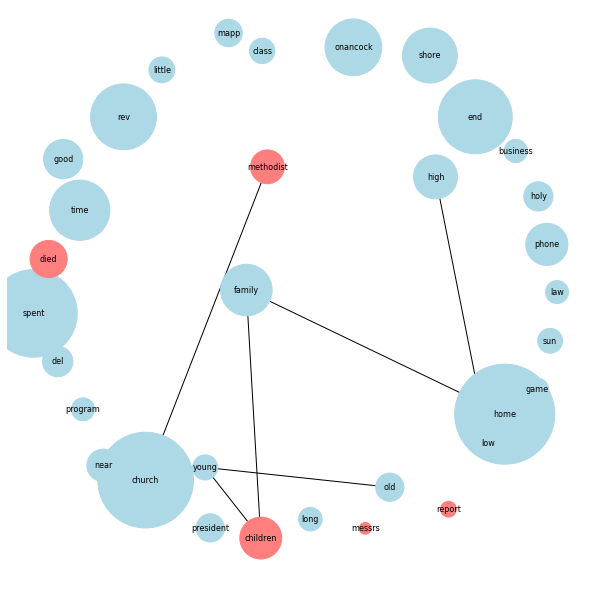

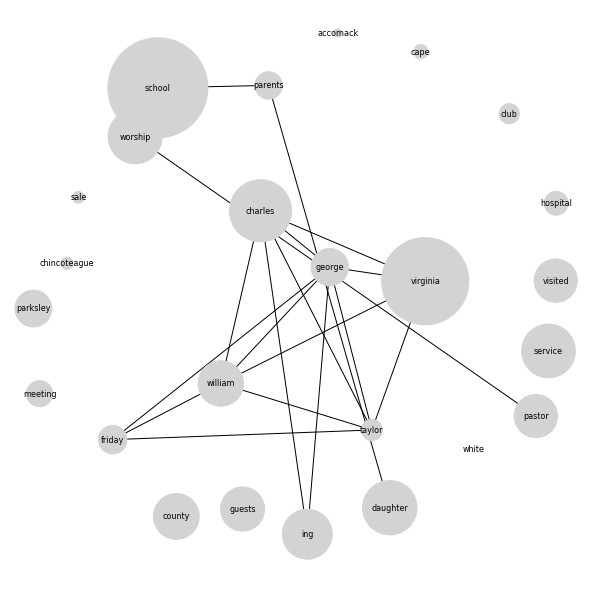

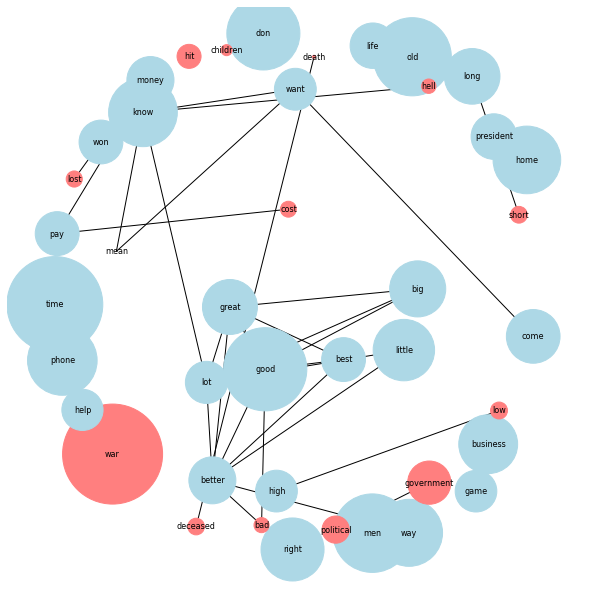

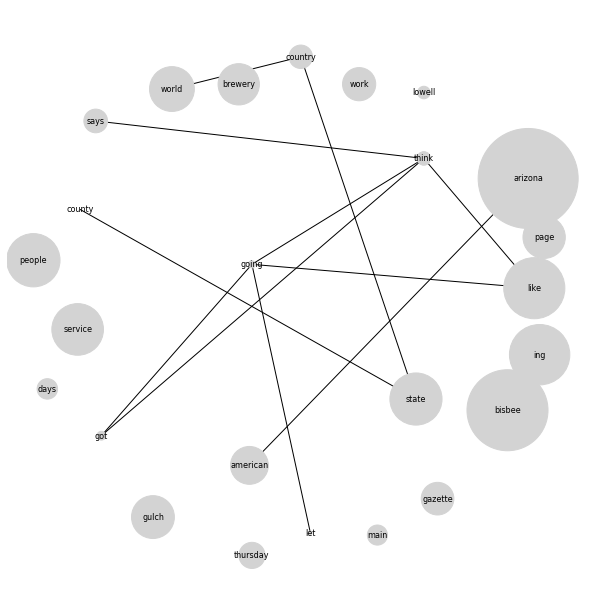

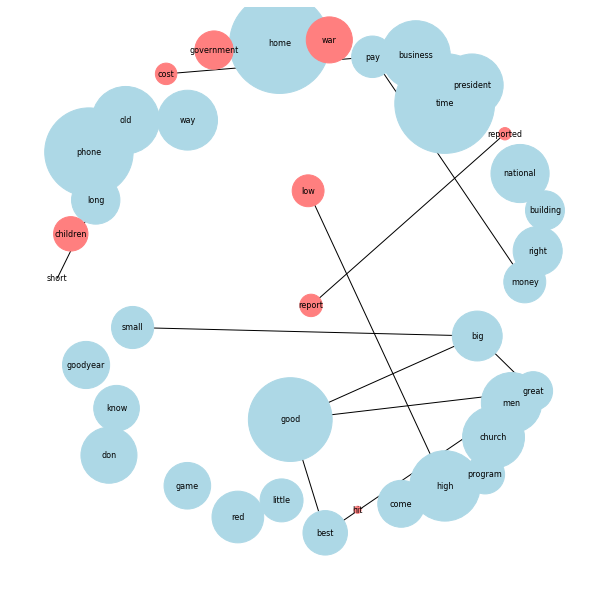

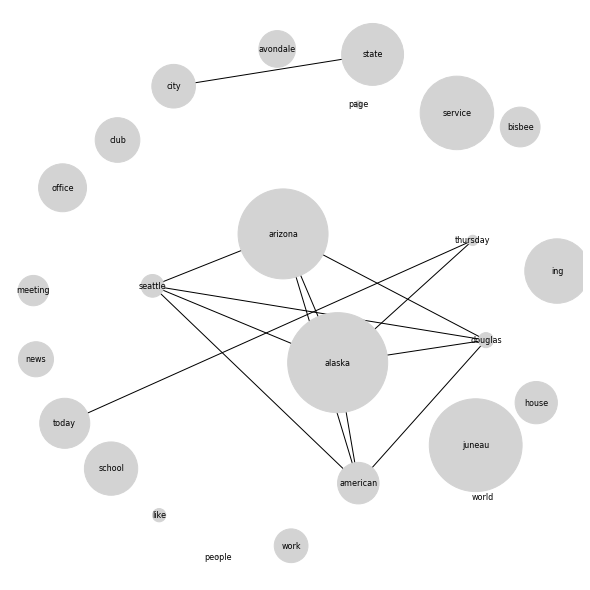

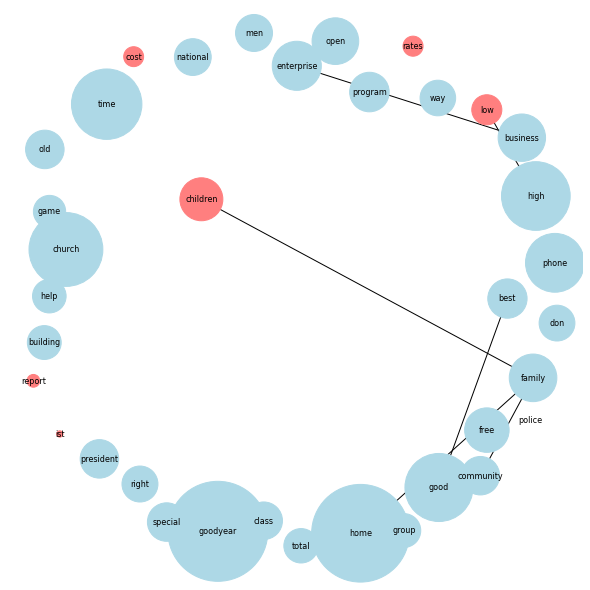

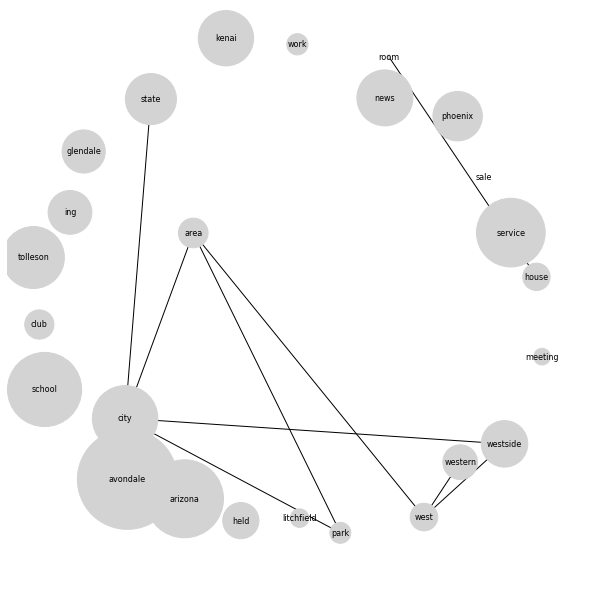

In [48]:
create_graph("refined_results_1.json", "1")
create_graph("refined_results_2.json", "2")
create_graph("refined_results_3.json", "3")